## matplotlib Notes

In [246]:
# Import the pandas
import pandas as pd

# Load datasets

seattle_weather = pd.read_csv('seattle_weather.csv')
austin_weather = pd.read_csv('austin_weather.csv')

In [247]:

# Defining levels of categorical variable MONTHS
cats = pd.date_range('2011-01-1', periods = 12, freq = 'M').strftime('%b')

## Seattle data

# Dropping variables and computing mean precipitations by MONTH
seattle_weather = seattle_weather[['DATE', 'MLY-PRCP-NORMAL', 'MLY-TAVG-NORMAL', 'MLY-PRCP-25PCTL', 'MLY-PRCP-75PCTL']].set_index('DATE').sort_index()
seattle_weather = seattle_weather.groupby(['DATE']).mean().round(2)

# Create MONTHS
seattle_weather['MONTH'] = seattle_weather.index
seattle_weather['MONTH'] = pd.to_datetime(seattle_weather['MONTH'], format = '%m').dt.month_name().str.slice(stop=3)
seattle_weather['MONTH'] = pd.Categorical(seattle_weather['MONTH'], categories = cats, ordered = True)




## Austin data

# Dropping variables and computing mean precipitations by MONTH
austin_weather = austin_weather[['DATE', 'MLY-PRCP-NORMAL', 'MLY-TAVG-NORMAL', 'MLY-PRCP-25PCTL', 'MLY-PRCP-75PCTL']].set_index('DATE').sort_index()
austin_weather = austin_weather.groupby(['DATE']).mean().round(2)

# Create MONTHS
austin_weather['MONTH'] = austin_weather.index
austin_weather['MONTH'] = pd.to_datetime(austin_weather['MONTH'], format = '%m').dt.month_name().str.slice(stop=3)
austin_weather['MONTH'] = pd.Categorical(austin_weather['MONTH'], categories = cats, ordered = True)





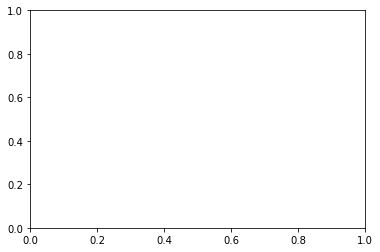

In [248]:
# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt

# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Call the show function to show the result
plt.show()

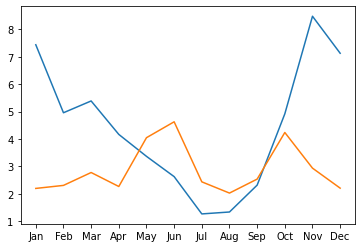

In [249]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Plot MLY-PRCP-NORMAL from seattle_weather against the MONTH
ax.plot(seattle_weather["MONTH"], seattle_weather['MLY-PRCP-NORMAL'])

# Plot MLY-PRCP-NORMAL from austin_weather against MONTH
ax.plot(austin_weather["MONTH"], austin_weather['MLY-PRCP-NORMAL'])

# Call the show function
plt.show()

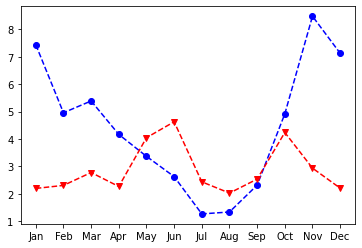

In [250]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Plot Seattle data, setting data appearance
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], color = 'b', marker = 'o', linestyle = '--')

# Plot Austin data, setting data appearance
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], color = 'r', marker = 'v', linestyle = '--')

# Call show to display the resulting plot
plt.show()

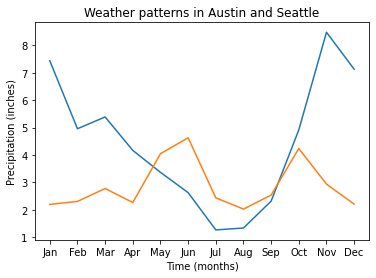

In [251]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"])
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"])

# Customize the x-axis label
ax.set_xlabel('Time (months)')

# Customize the y-axis label
ax.set_ylabel('Precipitation (inches)')


# Add the title
ax.set_title('Weather patterns in Austin and Seattle')

# Display the figure
plt.show()

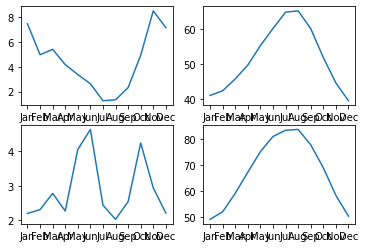

In [252]:
# Create a Figure and an array of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2)

# Addressing the top left Axes as index 0, 0, plot month and Seattle precipitation
ax[0, 0].plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-NORMAL'])

# In the top right (index 0,1), plot month and Seattle temperatures
ax[0, 1].plot(seattle_weather['MONTH'], seattle_weather['MLY-TAVG-NORMAL'])

# In the bottom left (1, 0) plot month and Austin precipitations
ax[1, 0].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-NORMAL'])

# In the bottom right (1, 1) plot month and Austin temperatures
ax[1, 1].plot(austin_weather['MONTH'], austin_weather['MLY-TAVG-NORMAL'])
plt.show()

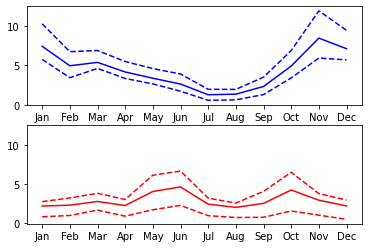

In [253]:
# Create a figure and an array of axes: 2 rows, 1 column with shared y axis
fig, ax = plt.subplots(2, 1, sharey=True)

# Plot Seattle precipitation data in the top axes
ax[0].plot(seattle_weather['MONTH'], seattle_weather["MLY-PRCP-NORMAL"], color = 'blue')
ax[0].plot(seattle_weather['MONTH'], seattle_weather["MLY-PRCP-25PCTL"], color = 'blue', linestyle = '--')
ax[0].plot(seattle_weather['MONTH'], seattle_weather["MLY-PRCP-75PCTL"], color = 'blue', linestyle = '--')

# Plot Austin precipitation data in the bottom axes
ax[1].plot(austin_weather['MONTH'], austin_weather["MLY-PRCP-NORMAL"], color = 'red')
ax[1].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-25PCTL'], color = 'red', linestyle = '--')
ax[1].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-75PCTL'], color = 'red', linestyle = '--')

plt.show()